# Run Main.ipynb

In [3]:
%run PreProccesser.ipynb

['C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Aave.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_BinanceCoin.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Bitcoin.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Cardano.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_ChainLink.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Cosmos.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_CryptocomCoin.csv', 'C:\\Users\\gahol\\OneDrive\\Desktop\\IE221-Data-Analys-Python\\Cryptocurrency Historical Prices Dataset\\coin_Dogec

# Forecast

# Initialization

Neural network Predict
Epoch 1/5
5/5 [==============================] - 5s 183ms/step - loss: 0.2586 - val_loss: 0.2401
Epoch 2/5
5/5 [==============================] - 0s 42ms/step - loss: 0.1086 - val_loss: 0.0699
Epoch 3/5
5/5 [==============================] - 0s 39ms/step - loss: 0.0817 - val_loss: 0.1543
Epoch 4/5
5/5 [==============================] - 0s 38ms/step - loss: 0.0787 - val_loss: 0.0914
Epoch 5/5
1/1 [==============================] - 0s 32ms/step - loss: 0.0894
Epoch 1/5
29/29 [==============================] - 5s 48ms/step - loss: 0.0068 - val_loss: 0.0023
Epoch 2/5
29/29 [==============================] - 1s 31ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 3/5
29/29 [==============================] - 1s 31ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 4/5
29/29 [==============================] - 1s 28ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 5/5
9/9 [==============================] - 0s 9ms/step - loss: 0.0344
Epoch 1/5
60/60 [==============================

'\nchạy kiểu có màn hình tương tác nhưng bị crash\n'

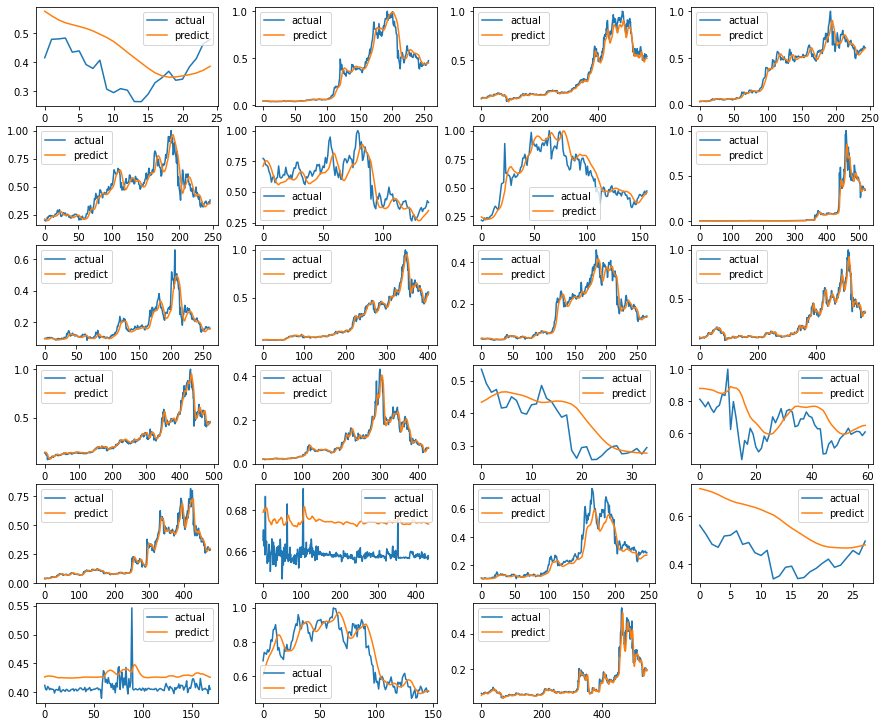

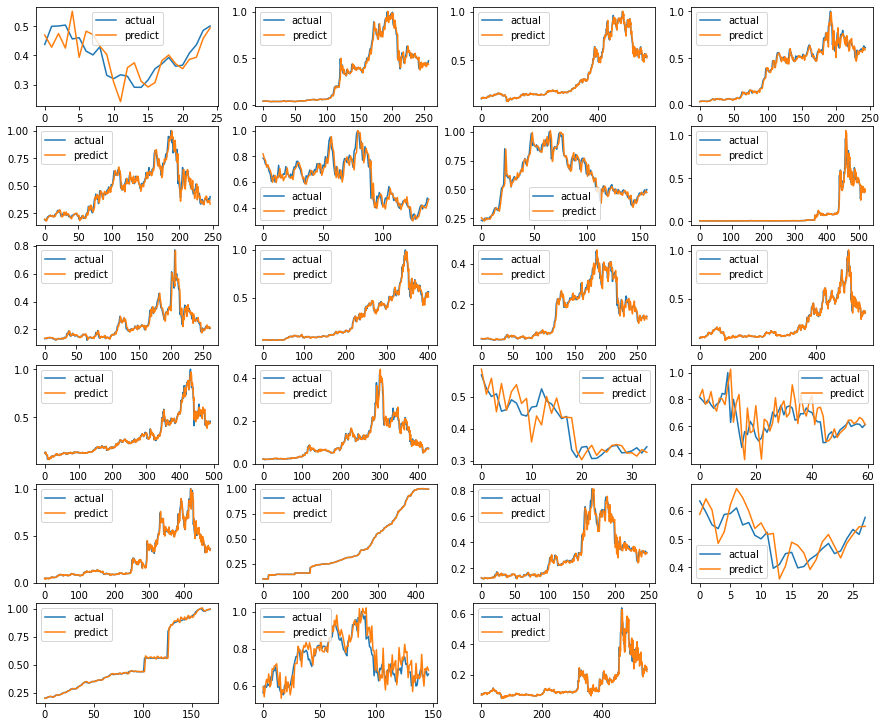

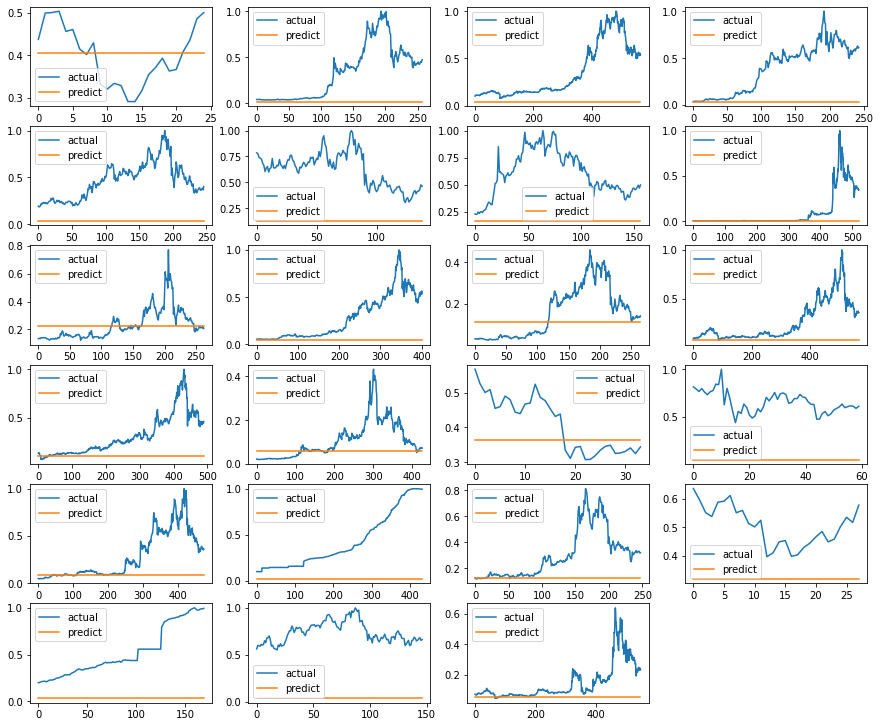

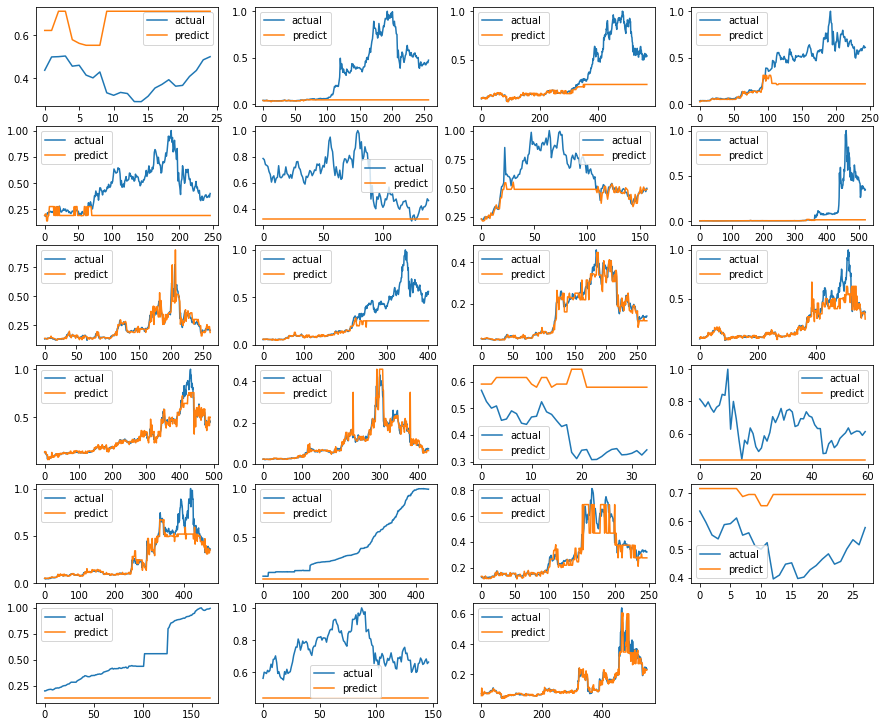

In [9]:
class forecast():  
    def Neural_network(self):
        def process_model_train(data): #argument data read from run function
            sc = MinMaxScaler(feature_range = (0,1))
            train_test = len(data) - int(.2*len(data))
            train = data.iloc[:train_test]            
            test = data.iloc[train_test:]             
            datafilter = data.iloc[:,7:8].values
            train = train.iloc[:,7:8].values    
            test = test.iloc[:,7:8].values      
            data = np.reshape(datafilter,(-1,1))
            train  = np.reshape(train,(-1,1))    
            test = np.reshape(test,(-1,1))        
            sc.fit(data)                
            train = sc.transform(train) 
            test =sc.transform(test)    
            x = []
            y = []
            time = 30                    
            for i in range(time,len(train)): 
                x.append(train[i-time:i,0]) 
                y.append(train[i,0])        
            x, y = np.array(x),np.array(y)              
            x = np.reshape(x,(x.shape[0],x.shape[1],1))    
            model = Sequential()                                              
            model.add(LSTM(128,input_shape = (x.shape[1], x.shape[2])))      
            model.add(Dropout(.3))                                            
            model.add(Dense(1))                                                
            model.add(Activation('linear'))                                   
            model.compile(optimizer= 'adam',loss='mae')        
            history = model.fit(x, y, validation_split=.2, epochs=5, batch_size=32)         
            x=[]
            y=[]
            time=30
            for i in range(time,len(test)):         
                x.append(test[i-time:i,0])
                y.append(test[i,0])
            x,y = np.array(x),np.array(y)              
            x  = np.reshape(x,(x.shape[0],x.shape[1],1))
            pred = model.predict(x)            
            result = model.evaluate(x,y)
            return result,pred,y
        def run():
            result ={}
            pred ={}
            actual ={}
            for i in paths:
                result[i],pred[i],actual[i] = process_model_train(data=pd.read_csv(i))             
            plt.figure(figsize=(15,15))
            for i in enumerate(paths):
                plt.subplot(7,4,i[0]+1)
                plt.plot(actual[i[1]],label='actual')
                plt.plot(pred[i[1]],label='predict')
                plt.legend(['actual','predict'])
        run()
    
    def Linear_Regression(self):
            def process_model_train(data): #argument data read from run function
                sc = MinMaxScaler(feature_range = (0,1))
                train_test = len(data) - int(.2*len(data))
                train = data.iloc[:train_test]            
                test = data.iloc[train_test:]             
                datafilter = data.iloc[0:,9:10].values
                train = train.iloc[0:,9:10].values    
                test = test.iloc[0:,9:10].values      
                data = np.reshape(datafilter,(-1,1))
                train  = np.reshape(train,(-1,1))    
                test = np.reshape(test,(-1,1))        
                sc.fit(data)                
                train = sc.transform(train) 
                test =sc.transform(test)    
                x = []
                y = []
                time = 30                    
                for i in range(time,len(train)): 
                    x.append(train[i-time:i,0]) 
                    y.append(train[i,0])        
                x, y = np.array(x),np.array(y)              
                x = np.reshape(x,(x.shape[0],x.shape[1]))    
                model=LinearRegression() 
                history = model.fit(x, y)        
                x=[]
                y=[]
                time=30
                for i in range(time,len(test)):         
                    x.append(test[i-time:i,0])
                    y.append(test[i,0])
                x,y = np.array(x),np.array(y)              
                x  = np.reshape(x,(x.shape[0],x.shape[1]))
                pred = model.predict(x)             
                return pred,y
            def run():

                pred ={}
                actual ={}
                for i in paths:
                    pred[i],actual[i] = process_model_train(data=pd.read_csv(i))           
                plt.figure(figsize=(15,15))
                for i in enumerate(paths):
                    plt.subplot(7,4,i[0]+1)
                    plt.plot(actual[i[1]],label='actual')
                    plt.plot(pred[i[1]],label='predict')
                    plt.legend(['actual','predict'])
            run()

    def Lasso(self):
            def process_model_train(data): #argument data read from run function
                sc = MinMaxScaler(feature_range = (0,1))
                train_test = len(data) - int(.2*len(data))
                train = data.iloc[:train_test]            
                test = data.iloc[train_test:]             
                datafilter = data.iloc[0:,9:10].values
                train = train.iloc[0:,9:10].values    
                test = test.iloc[0:,9:10].values      
                data = np.reshape(datafilter,(-1,1))
                train  = np.reshape(train,(-1,1))    
                test = np.reshape(test,(-1,1))        
                sc.fit(data)                
                train = sc.transform(train) 
                test =sc.transform(test)    
                x = []
                y = []
                time = 30                    
                for i in range(time,len(train)): 
                    x.append(train[i-time:i,0]) 
                    y.append(train[i,0])        
                x, y = np.array(x),np.array(y)              
                x = np.reshape(x,(x.shape[0],x.shape[1]))    
                model=Lasso() 
                history = model.fit(x, y)        
                x=[]
                y=[]
                time=30
                for i in range(time,len(test)):         
                    x.append(test[i-time:i,0])
                    y.append(test[i,0])
                x,y = np.array(x),np.array(y)              
                x  = np.reshape(x,(x.shape[0],x.shape[1]))
                pred = model.predict(x)            
                return pred,y
            def run():

                pred ={}
                actual ={}
                for i in paths:
                    pred[i],actual[i] = process_model_train(data=pd.read_csv(i))          
                plt.figure(figsize=(15,15))
                for i in enumerate(paths):
                    plt.subplot(7,4,i[0]+1)
                    plt.plot(actual[i[1]],label='actual')
                    plt.plot(pred[i[1]],label='predict')
                    plt.legend(['actual','predict'])
            run()

    def Decision_Tree_Regressor(self):
            def process_model_train(data): #argument data read from run function
                sc = MinMaxScaler(feature_range = (0,1))
                train_test = len(data) - int(.2*len(data))
                train = data.iloc[:train_test]            
                test = data.iloc[train_test:]             
                datafilter = data.iloc[0:,9:10].values
                train = train.iloc[0:,9:10].values    
                test = test.iloc[0:,9:10].values      
                data = np.reshape(datafilter,(-1,1))
                train  = np.reshape(train,(-1,1))    
                test = np.reshape(test,(-1,1))        
                sc.fit(data)                
                train = sc.transform(train) 
                test =sc.transform(test)    
                x = []
                y = []
                time = 30                    
                for i in range(time,len(train)): 
                    x.append(train[i-time:i,0]) 
                    y.append(train[i,0])        
                x, y = np.array(x),np.array(y)              
                x = np.reshape(x,(x.shape[0],x.shape[1]))    
                model=DecisionTreeRegressor() 
                history = model.fit(x, y)        
                x=[]
                y=[]
                time=30
                for i in range(time,len(test)):         
                    x.append(test[i-time:i,0])
                    y.append(test[i,0])
                x,y = np.array(x),np.array(y)              
                x  = np.reshape(x,(x.shape[0],x.shape[1]))
                pred = model.predict(x)            
                return pred,y
            def run():
                pred ={}
                actual ={}
                for i in paths:
                    pred[i],actual[i] = process_model_train(data=pd.read_csv(i))           
                plt.figure(figsize=(15,15))
                for i in enumerate(paths):
                    plt.subplot(7,4,i[0]+1)
                    plt.plot(actual[i[1]],label='actual')
                    plt.plot(pred[i[1]],label='predict')
                    plt.legend(['actual','predict'])
            run()
            '''
                MinMaxScale để dữ liệu chỉ phân hóa trong khoảng từ 0 đến 1
                chia tập train và test theo tỷ lệ 8:2
                iloc[0:,9:10] là để lấy ra cột marketcap , có thể thay đổi nếu muốn test trên field khác
                reshape để dữ liệu về dạng 1 cột
                fit dữ liệu để nó vào khoảng min max đã đề trước
                dặt thời gian muốn train ở đây là chọn 30 ngày
                tạo x , và y để thành mảng 2 chiều thêm lần lượt dữ liệu vào cột x có thể thay đổi và cột y dữ liệu đều = 30
                sau đó cho dữ liệu vào train và cho ra dự đoán
                rồi tạo nhãn cho bộ test rồi so sánh 2 bộ lại với nhau
                
            '''
fc = forecast()
print('Neural network Predict')
fc.Neural_network()
print('Linear Regression Predict')
fc.Linear_Regression()
print('Lasso Predict')
fc.Lasso()
print('Decision Tree Regressor Predict')
fc.Decision_Tree_Regressor()
'''
chạy kiểu không có màn hình tương tác
'''
# window = Tk()
# window.title('Forecast By Marketcap')
# window.geometry("500x500")
# def Neural_network():
#     fc.Neural_network()
# def Linear_Regression():
#     fc.Linear_Regression()
# def Lasso():
#     fc.Lasso()
# def Decision_Tree_Regressor():
#     fc.Decision_Tree_Regressor()
# NRP =Button(window, text="Neural network Predict Submit", width=30, command=Neural_network).pack()
# LNP =Button(window, text="Linear Regression Predict Submit", width=30, command=Linear_Regression).pack()
# LP =Button(window, text="Lasso Predict Submit", width=30, command=Lasso).pack()
# DTRP =Button(window, text="Decision Tree Regressor Predict Submit", width=30, command=Decision_Tree_Regressor).pack()
# window.mainloop()

'''
chạy kiểu có màn hình tương tác nhưng bị crash
'''